In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
input_dir = 'dataset/martensite microstructure'
output_dir = 'dataset/martensite microstructure preprocessed'

list_name = os.listdir(input_dir)
list_path = []

for i in list_name :
    list_path.append(os.path.join(input_dir, i))

In [4]:
def detect_large_white_area(image_path, area_threshold=0.01):
    """
    Détecte si une image contient une large zone blanche.

    :param image_path: Chemin vers l'image à analyser.
    :param area_threshold: Seuil de l'aire pour considérer un contour comme une grande zone blanche.
    :return: Booléen indiquant la présence d'une grande zone blanche.
    """
    # Charger l'image et la convertir en niveaux de gris
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer un seuillage pour isoler les zones blanches
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # Trouver les contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyser chaque contour pour détecter de grandes zones blanches
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > area_threshold:
            return True  # Une grande zone blanche a été trouvée

    return False  # Aucune grande zone blanche détectée


In [5]:
# Exemple d'utilisation
image_path = 'dataset/martensite microstructure/Image_1.png'

if detect_large_white_area(image_path):
    print("L'image contient une large zone blanche.")
else:
    print("L'image ne contient pas de large zone blanche.")

L'image contient une large zone blanche.


In [8]:
import cv2
import numpy as np

def detect_large_white_area(image_path, area_threshold=0.01, border_margin=0.1):
    """
    Détecte si une image contient une large zone blanche, en ignorant une marge autour des bords.

    :param image_path: Chemin vers l'image à analyser.
    :param area_threshold: Proportion de l'aire pour considérer un contour comme une grande zone blanche.
    :param border_margin: Proportion de la marge à ignorer autour des bords de l'image.
    :return: Booléen indiquant la présence d'une grande zone blanche.
    """
    # Charger l'image et la convertir en niveaux de gris
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculer la marge en pixels à ignorer autour de l'image
    h, w = gray.shape
    x_margin = int(w * border_margin)
    y_margin = int(h * border_margin)

    # Définir la région d'intérêt (ROI) pour exclure les bords
    roi = gray[y_margin:h-y_margin, x_margin:w-x_margin]

    # Appliquer un seuillage pour isoler les zones blanches dans la ROI
    _, thresh = cv2.threshold(roi, 240, 255, cv2.THRESH_BINARY)

    # Trouver les contours dans la ROI
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyser chaque contour pour détecter de grandes zones blanches
    image_area = w * h
    for contour in contours:
        area = cv2.contourArea(contour)
        if area / image_area > area_threshold:  # Utilisation de la proportion de l'aire
            return True  # Une grande zone blanche a été trouvée dans la ROI

    return False  # Aucune grande zone blanche détectée dans la ROI



TEST pour voir une aire

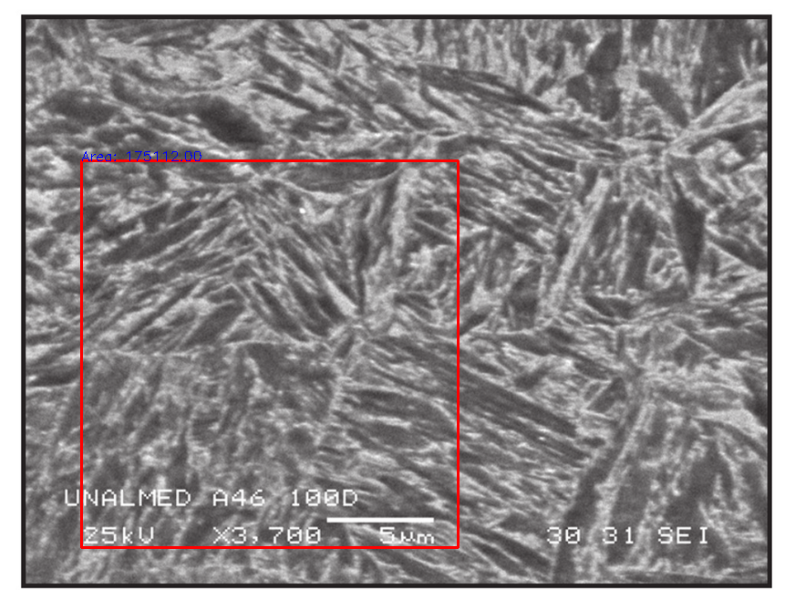

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Exemple d'utilisation
image_path = 'dataset/martensite microstructure/Image_1.png'

# Les coordonnées semblent être les coins d'un quadrilatère et non d'un rectangle
# Si c'est destiné à être un rectangle, assurez-vous que les points sont les coins d'un rectangle
test = np.array([[78, 169], [397, 166], [120, 589], [490, 278]])

# Charger l'image et la convertir en niveaux de gris
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage pour isoler les zones blanches
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

# Calculer le rectangle englobant pour le contour donné par 'test'
x, y, w, h = cv2.boundingRect(test)

# Créer une copie de l'image pour le dessin
image_with_areas = image.copy()

# Dessiner un rectangle autour de la région spécifiée par 'test'
cv2.rectangle(image_with_areas, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Calculer l'aire du rectangle
area = w * h

# Position du texte (par exemple, en haut à gauche du rectangle)
text_position = (x, y)

# Convertir l'aire en chaîne de caractères pour l'affichage
area_text = f"Area: {area:.2f}"

# Dessiner le texte sur l'image
cv2.putText(image_with_areas, area_text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Convertir l'image de BGR (OpenCV) à RGB (matplotlib)
image_with_areas_rgb = cv2.cvtColor(image_with_areas, cv2.COLOR_BGR2RGB)

# Utiliser matplotlib pour afficher l'image
plt.figure(figsize=(10, 10))
plt.imshow(image_with_areas_rgb)
plt.axis('off')  # Cacher les axes
plt.show()


In [11]:
for contour in contours:
    area = cv2.contourArea(contour)
    image.shape
    print("Aire du contour:", area)

image.shape

NameError: name 'contours' is not defined

In [12]:
import re

def numerical_sort(value):
    """
    Extrait les parties numériques d'une chaîne de caractères et les convertit en entier pour le tri.
    """
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])  # Convertit les chaînes numériques en entiers
    return parts

In [13]:
for i in sorted(list_path, key=numerical_sort):
    try:
        # Assurez-vous que l'image a été chargée correctement
        image = cv2.imread(i)
        if image is None:
            raise ValueError(f"Impossible de charger l'image {i}")

        large_white_area = detect_large_white_area(i, area_threshold=0.01, border_margin=0.1)
        print(f"Large white area detected: {i} " if large_white_area else "No large white area detected.")
    except ValueError as e:
        print(f"Erreur lors du traitement de l'image {i}: {e}")


No large white area detected.
No large white area detected.
No large white area detected.
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_5.png 


libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Large white area detected: dataset/martensite microstructure/Image_6.png 
No large white area detected.
No large white area detected.
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_11.png 
Large white area detected: dataset/martensite microstructure/Image_12.jpg 
Large white area detected: dataset/martensite microstructure/Image_13.png 
Large white area detected: dataset/martensite microstructure/Image_14.png 
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_17.png 
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_19.png 
Large white area detected: dataset/martensite microstructure/Image_20.png 
Erreur lors du traitement de l'image dataset/martensite microstructure/Image_21.gif: Impossible de charger l'image dataset/martensite microstructure/Image_21.gif
Large white area detected: dataset/martensite microstructure/Image_22.png 
No large white

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Large white area detected: dataset/martensite microstructure/Image_24.png 
No large white area detected.
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_28.jpg 
No large white area detected.
Erreur lors du traitement de l'image dataset/martensite microstructure/Image_31.gif: Impossible de charger l'image dataset/martensite microstructure/Image_31.gif
Large white area detected: dataset/martensite microstructure/Image_32.png 
No large white area detected.
No large white area detected.
Erreur lors du traitement de l'image dataset/martensite microstructure/Image_37.gif: Impossible de charger l'image dataset/martensite microstructure/Image_37.gif
Large white area detected: dataset/martensite microstructure/Image_38.png 


libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Large white area detected: dataset/martensite microstructure/Image_40.png 
No large white area detected.
No large white area detected.
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_44.png 
No large white area detected.
No large white area detected.
No large white area detected.
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_49.png 
No large white area detected.
Erreur lors du traitement de l'image dataset/martensite microstructure/Image_51.gif: Impossible de charger l'image dataset/martensite microstructure/Image_51.gif
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_53.jpg 
Large white area detected: dataset/martensite microstructure/Image_54.jpg 
No large white area detected.
Large white area detected: dataset/martensite microstructure/Image_57.png 
Large white area detected: dataset/martensite microstructure/Image_59.png 
Large white a